In [1]:
import mynn as nn
from draw_tools.plot import plot

import numpy as np
from struct import unpack
import gzip
import matplotlib.pyplot as plt
import pickle

# fixed seed for experiment
np.random.seed(309)

train_images_path = r'.\dataset\MNIST\train-images-idx3-ubyte.gz'
train_labels_path = r'.\dataset\MNIST\train-labels-idx1-ubyte.gz'

with gzip.open(train_images_path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        train_imgs=np.frombuffer(f.read(), dtype=np.uint8).reshape(num, 28*28)
    
with gzip.open(train_labels_path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        train_labs = np.frombuffer(f.read(), dtype=np.uint8)


# choose 10000 samples from train set as validation set.
idx = np.random.permutation(np.arange(num))
# save the index.
with open('idx.pickle', 'wb') as f:
        pickle.dump(idx, f)
train_imgs = train_imgs[idx]
train_labs = train_labs[idx]
valid_imgs = train_imgs[:10000]
valid_labs = train_labs[:10000]
train_imgs = train_imgs[10000:]
train_labs = train_labs[10000:]

# normalize from [0, 255] to [0, 1]
train_imgs = train_imgs / train_imgs.max()
valid_imgs = valid_imgs / valid_imgs.max()

def train_model(nHidden, lr=0.5, epochs=50,patience=5):
    # 模型结构：输入层 + 隐藏层 + 输出层
    size_list = [train_imgs.shape[1]] + nHidden + [10]
    lambda_list = [1e-4] * (len(nHidden) + 1)  # 每层一个lambda
    
    # 初始化组件
    model = nn.models.Model_MLP(size_list, 'ReLU', lambda_list, dropout_rates=None)
    opt = nn.optimizer.MomentGD(init_lr=lr, model=model,mu=0.9)
    scheduler = nn.lr_scheduler.MultiStepLR(opt, milestones=[7500, 70000, 80000], gamma=0.5)
    # scheduler = nn.lr_scheduler.ExponentialLR(opt, gamma=0.99)
    loss_fn = nn.op.MultiCrossEntropyLoss(model=model)
    
    
    # 训练运行器
    trainer = nn.runner.RunnerM(
        model=model,
        optimizer=opt,
        metric=nn.metric.accuracy,
        loss_fn=loss_fn,
        batch_size=32,
        scheduler=scheduler
    )
    
    # 执行训练
    trainer.train(
        train_set=[train_imgs, train_labs],
        dev_set=[valid_imgs, valid_labs],
        num_epochs=epochs,
        log_iters=100,
        patience = patience
        # save_dir=f'./saved_models/hidden_{"_".join(map(str, nHidden))}'
    )
    
    # 绘制训练曲线
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].plot(trainer.train_loss, label='Train Loss')
    axes[0].plot(trainer.dev_loss, label='Val Loss')
    axes[0].set_title('Loss Curve')
    axes[0].legend()
    
    axes[1].plot(trainer.train_scores, label='Train Acc')
    axes[1].plot(trainer.dev_scores, label='Val Acc')
    axes[1].set_title('Accuracy Curve')
    axes[1].legend()
    
    plt.show()
    
    return trainer

# ==========32========

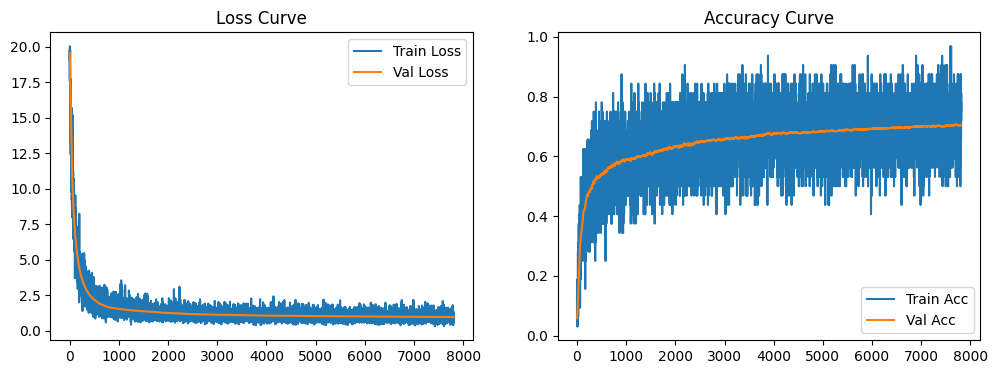

The best train accuracy: 0.96875
The best validation accuracy: 0.7074


In [11]:
nHidden = [32]
trainer_32 = train_model(nHidden)
print("The best train accuracy:", max(trainer_32.train_scores))
print("The best validation accuracy:", max(trainer_32.dev_scores))

# =========64==========

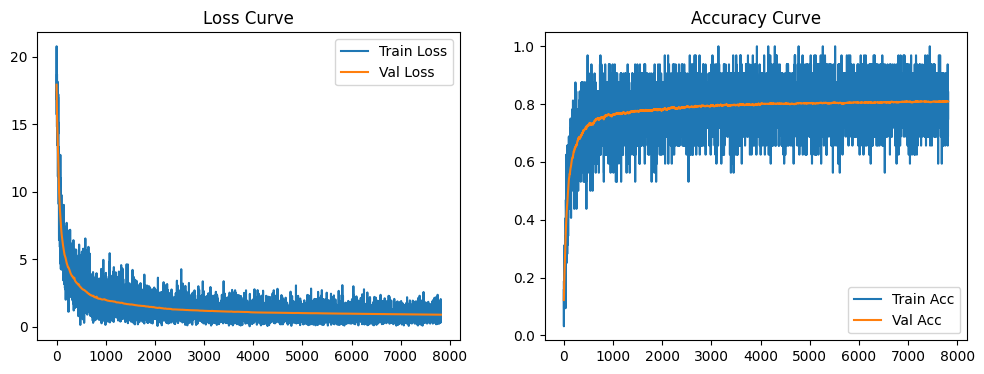

The best train accuracy: 1.0
The best validation accuracy: 0.8104


In [13]:
nHidden = [64]
trainer_64 = train_model(nHidden)
print("The best train accuracy:", max(trainer_64.train_scores))
print("The best validation accuracy:", max(trainer_64.dev_scores))

# ===============128==============

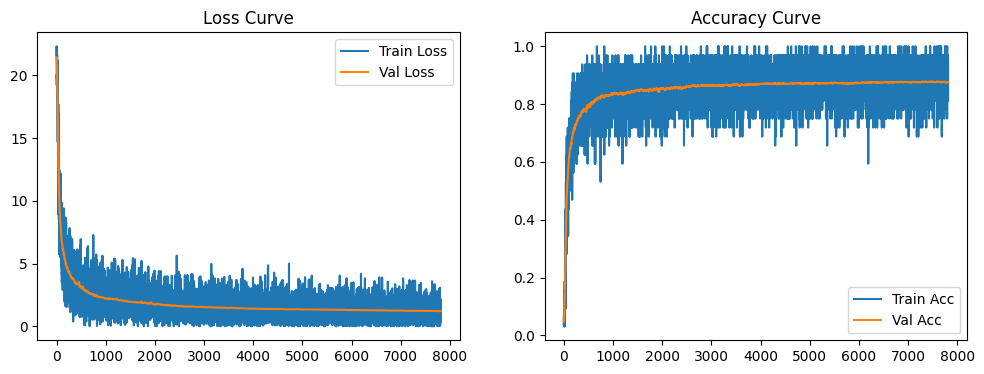

The best train accuracy: 1.0
The best validation accuracy: 0.8779


In [14]:
nHidden = [128]
trainer_128 = train_model(nHidden)
print("The best train accuracy:", max(trainer_128.train_scores))
print("The best validation accuracy:", max(trainer_128.dev_scores))

# =============256==============

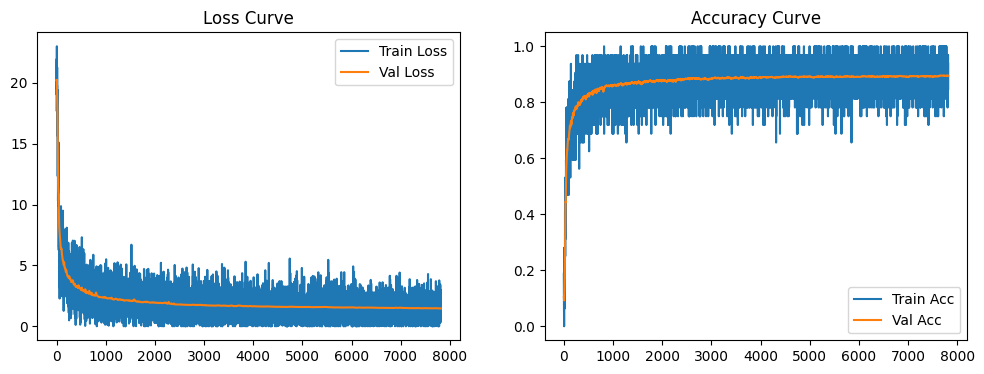

The best train accuracy: 1.0
The best validation accuracy: 0.8957


In [15]:
nHidden = [256]
trainer_256 = train_model(nHidden)
print("The best train accuracy:", max(trainer_256.train_scores))
print("The best validation accuracy:", max(trainer_256.dev_scores))

# =========He 初始化=========

Epoch: 1/50
[Train] Loss: 0.3143, Score: 0.9097
[Dev]   Loss: 0.2277, Score: 0.9376

Epoch: 2/50
[Train] Loss: 0.1950, Score: 0.9471
[Dev]   Loss: 0.1905, Score: 0.9490

Epoch: 3/50
[Train] Loss: 0.1769, Score: 0.9532
[Dev]   Loss: 0.1792, Score: 0.9517

Epoch: 4/50
[Train] Loss: 0.1682, Score: 0.9560
[Dev]   Loss: 0.1676, Score: 0.9574

Epoch: 5/50
[Train] Loss: 0.1622, Score: 0.9582
[Dev]   Loss: 0.1585, Score: 0.9597

Epoch: 6/50
[Train] Loss: 0.1511, Score: 0.9624
[Dev]   Loss: 0.1579, Score: 0.9577

Epoch: 7/50
[Train] Loss: 0.1492, Score: 0.9639
[Dev]   Loss: 0.1577, Score: 0.9616

Epoch: 8/50
[Train] Loss: 0.1483, Score: 0.9641
[Dev]   Loss: 0.1640, Score: 0.9597

Epoch: 9/50
[Train] Loss: 0.1486, Score: 0.9637
[Dev]   Loss: 0.1569, Score: 0.9580

Epoch: 10/50
[Train] Loss: 0.1474, Score: 0.9644
[Dev]   Loss: 0.1615, Score: 0.9587

Epoch: 11/50
[Train] Loss: 0.1470, Score: 0.9645
[Dev]   Loss: 0.1586, Score: 0.9597

Early stopping triggered at epoch 12, no improvement for 5 cons

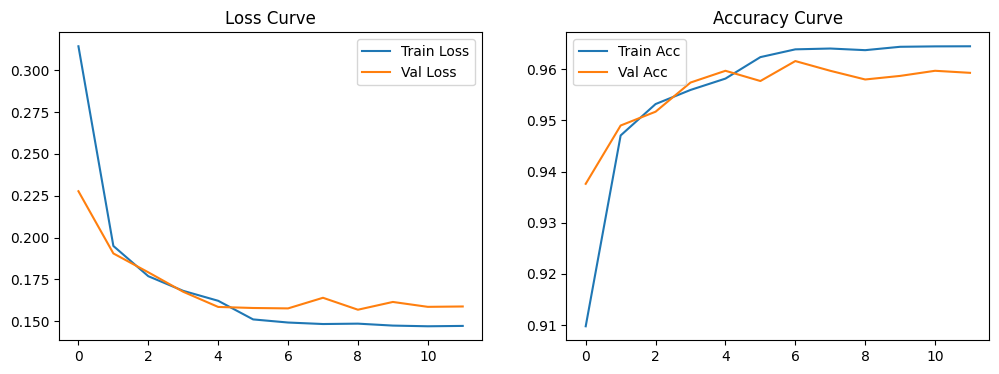

The best train accuracy: 0.9644913627639156
The best validation accuracy: 0.9616


In [3]:
trainer_he = train_model(nHidden=[128])
print("The best train accuracy:", max(trainer_he.train_scores))
print("The best validation accuracy:", max(trainer_he.dev_scores))

普通正态初始化

Epoch: 1/50
[Train] Loss: 1.1491, Score: 0.8567
[Dev]   Loss: 0.2806, Score: 0.9172

Epoch: 2/50
[Train] Loss: 0.2234, Score: 0.9340
[Dev]   Loss: 0.2063, Score: 0.9399

Epoch: 3/50
[Train] Loss: 0.1850, Score: 0.9491
[Dev]   Loss: 0.1876, Score: 0.9465

Epoch: 4/50
[Train] Loss: 0.1716, Score: 0.9545
[Dev]   Loss: 0.1755, Score: 0.9535

Epoch: 5/50
[Train] Loss: 0.1641, Score: 0.9581
[Dev]   Loss: 0.1632, Score: 0.9583

Epoch: 6/50
[Train] Loss: 0.1529, Score: 0.9624
[Dev]   Loss: 0.1652, Score: 0.9580

Epoch: 7/50
[Train] Loss: 0.1512, Score: 0.9630
[Dev]   Loss: 0.1604, Score: 0.9571

Epoch: 8/50
[Train] Loss: 0.1502, Score: 0.9639
[Dev]   Loss: 0.1574, Score: 0.9594

Epoch: 9/50
[Train] Loss: 0.1484, Score: 0.9640
[Dev]   Loss: 0.1585, Score: 0.9601

Epoch: 10/50
[Train] Loss: 0.1474, Score: 0.9644
[Dev]   Loss: 0.1629, Score: 0.9557

Epoch: 11/50
[Train] Loss: 0.1480, Score: 0.9644
[Dev]   Loss: 0.1571, Score: 0.9608

Epoch: 12/50
[Train] Loss: 0.1462, Score: 0.9642
[Dev]   Loss: 

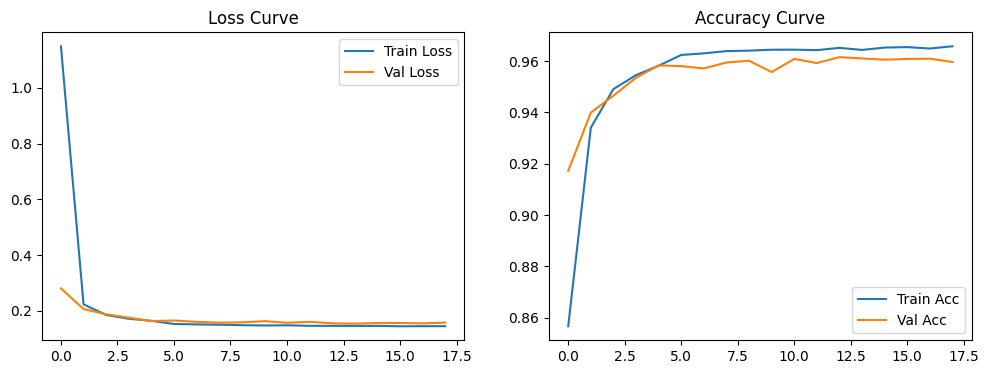

The best train accuracy: 0.965730966090851
The best validation accuracy: 0.9615


In [8]:
trainer_normal = train_model(nHidden=[128])
print("The best train accuracy:", max(trainer_normal.train_scores))
print("The best validation accuracy:", max(trainer_normal.dev_scores))

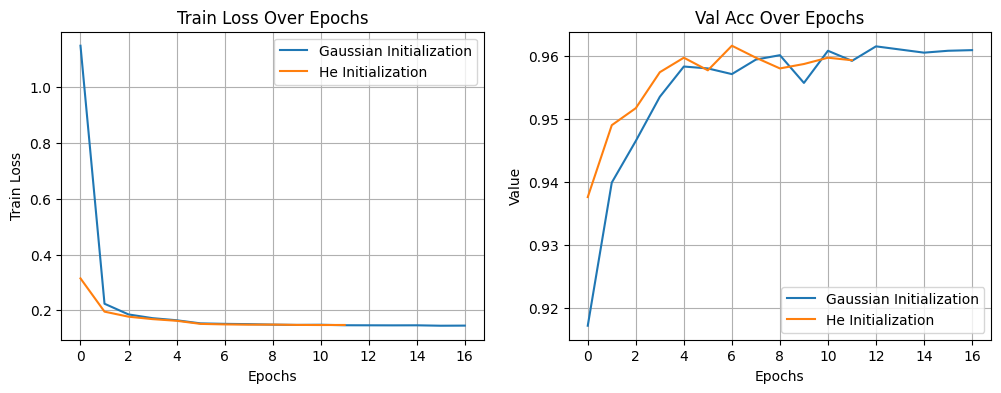

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 第一个子图：绘制训练损失
ax1.plot(trainer_normal.train_loss, label="Gaussian Initialization")
ax1.plot(trainer_he.train_loss, label="He Initialization")
ax1.set_title("Train Loss Over Epochs")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Train Loss")
ax1.legend()
ax1.grid(True)

# 第二个子图：绘制验证分数
ax2.plot(trainer_normal.dev_scores, label="Gaussian Initialization")
ax2.plot(trainer_he.dev_scores, label="He Initialization")
ax2.set_title("Val Acc Over Epochs")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Value")
ax2.legend()
ax2.grid(True)

# 显示图像
plt.show()

# =========可视化===========

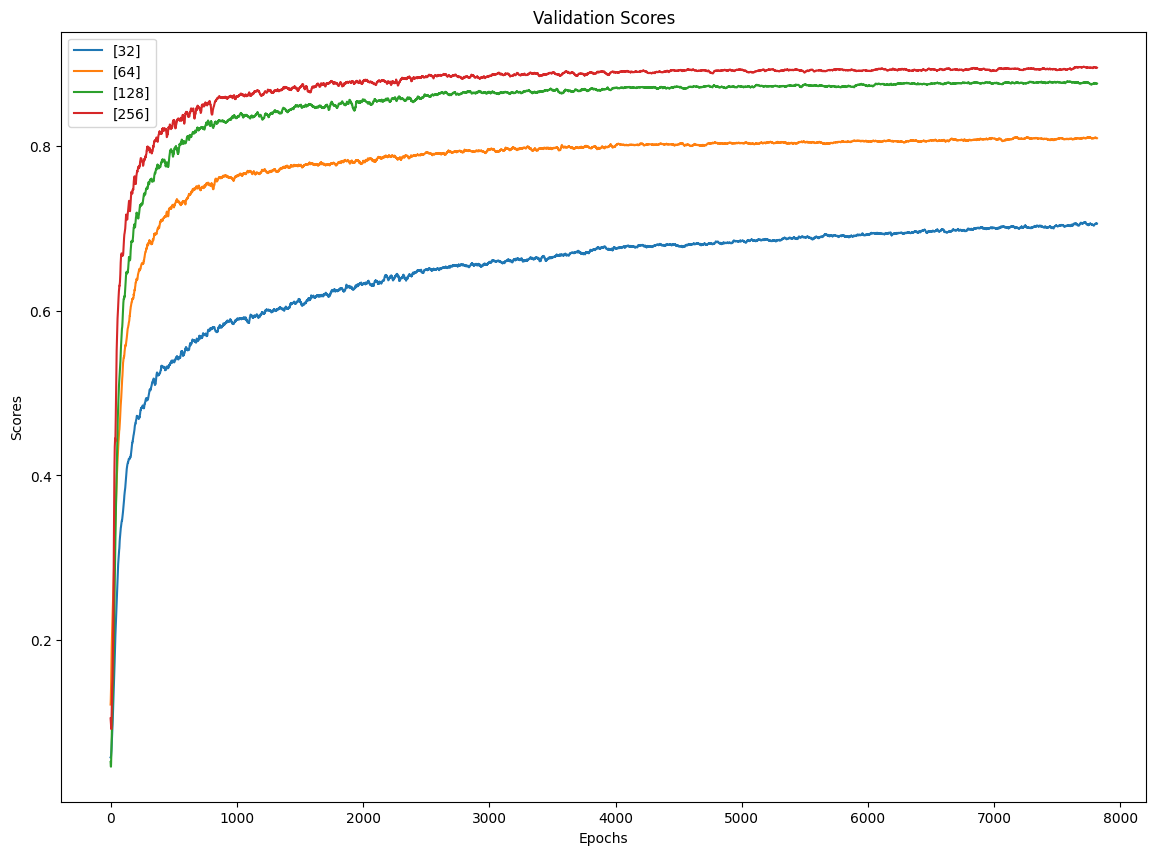

In [17]:
import matplotlib.pyplot as plt


# # 绘制validation scores图像
plt.figure(figsize=(14, 10))
plt.plot(trainer_32.dev_scores, label='[32]')
plt.plot(trainer_64.dev_scores, label='[64]')
plt.plot(trainer_128.dev_scores, label='[128]')
plt.plot(trainer_256.dev_scores, label='[256]')
# plt.plot(trainer_64_32.dev_scores, label='[64,32]')
# plt.plot(trainer_128_64.dev_scores, label='[128,64]')
plt.title('Validation Scores')
plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.legend()